<div style='text-align:center'>
<img src='https://upload.wikimedia.org/wikipedia/commons/e/e5/UNIRIO_Logo-2011-03-08.png' width='50'>
    <h1>Projeto Final da Disciplina Intelig√™ncia Artificial - PPGI UNIIO</h1>
</div>

__Autores:__ Marcelo Simas Mattos / Reinaldo Eustaquio da Silva<br>
__Professora:__ Ana Cristina Bicharra Garcia<br>
__Tema:__ *__Opini√µes em E-commerce de Roupas Femininas - Processamento de Linguagem Natural(NLP)__* <br>

***

### √çndice do Trabalho:
* [Introdu√ß√£o](#first-bullet)
* [Instalando os Pacotes Necess√°rios](#second-bullet)
* [Importando M√≥dulos](#third-bullet)
* [Carregando e Visualizando a Base](#fourth-bullet)
* [Contabilizando as Avalia√ß√µes(Ratings) e Recomenda√ß√µes](#fifth-bullet)
* [Analisando o Texto Apresentado nas Avalia√ß√µes](#sixth-bullet)
* [Concatenando o Texto do T√≠tulo com o da Avalia√ß√£o](#seventh-bullet)
* [Eliminando os nulos da base e indicando o total de registros que ser√£o trabalhados](#eighth-bullet)
* [Avaliando as Recomenda√ß√µes Positivas e Negativas](#nineth-bullet)
* [Analisando o Tamanho do Texto da Avalia√ß√£o e Gerando Estat√≠sticas](tenth-bullet)
* [Verificando o Tamanho do Texto da Avalia√ß√£o com a Recomenda√ß√£o (Positiva/Negativa)](#eleventh-bullet)
* [Verificando Polaridade da Avalia√ß√£o](#Twelfth-bullet)
* [Processando o Texto da Avalia√ß√£o](#Thirteenth-bullet)
* [Verificando as Senten√ßas do Texto da Avalia√ß√£o](#fourteenth-bullet)
* [Fazendo o Tratamento do Texto de Avalia√ß√£o](#fifteenth-bullet)
* [Nuvem de Palavras das Avalia√ß√µes Positivas e Negativas](#sixteenth-bullet)
* [Utilizando o Saco de Palavras](#seventeenth-bullet)
* [TF-IDF](#eighteenth-bullet)
* [Mesclando a matriz esparsa com outros recursos](#nineteenth-bullet)
* [Dividindo os Dados](#twentieth-bullet)
* [Utilizando o MinMax Scaler](#twenty-first-bullet)
* [Visualiza√ß√£o PCA](#twenty-second-bullet)
* [Modelos](#twenty-third-bullet)
* [Resultados](#twenty-fourth-bullet)
***

### Introdu√ß√£o <a class="anchor" id="first-bullet"></a>
Este projeto tem como objetivo apresentar um estudo de modelos de machine learning (aprendizagem de m√°quina) para realiza√ß√£o de predi√ß√£o sobre avalia√ß√£o de roupas femininas em com√©rcio eletr√¥nico. Foi utilizado um conjunto de dados do [Women's E-Commerce Clothing Reviews]( https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews?select=Womens+Clothing+E-Commerce+Reviews.csv) dispon√≠vel no Kaggle<sup>[1](#myfootnote1)</sup>, que √© composto de aproximadamente 23 mil avalia√ß√µes escritas por clientes de com√©rcio eletr√¥nico de roupas femininas. Este conjunto de dados √© de dom√≠nio p√∫blico licenciado como CC0: Public Domain.

No desenvolvimento deste projeto foram realizadas as etapas:
* Instala√ß√£o e importa√ß√£o dos pacotes de Python;
* An√°lise da Base e prepara√ß√£o da base;
* Pr√©processamento de texto;
* Emprego do m√≥dulo NLTK do Python (m√≥dulo do Python que possui muitas fun√ß√µes para uso e an√°lise lingu√≠stica e processamento de linguagem natural);
* Apresenta√ß√£o de nuvens de palavras para avalia√ß√µes positivas e negativas;
* Avalia√ß√£o dos modelos:
    * Logistic Regression
    * SVM
    * Random Forest
    * AdaBoost
* Apresenta√ß√£o dos Resultados;
* Cria√ß√£o de um widgets interativo para predi√ß√£o de uma avalia√ß√£o.

<a name="myfootnote1">1</a>: O Kaggle foi fundado em 2010 oferecendo competi√ß√µes de aprendizagem de m√°quina. Atualmente ele oferece tamb√©m um ambiente Jupyter personaliz√°ve, acesso a GPUs gratuitas e a um reposit√≥rio de dados e c√≥digos publicados pela comunidade.

***

### Instalando os Pacotes Necess√°rios  <a class="anchor" id="second-bullet"></a>

In [1]:
#Instalando Pacotes
#!pip install scikit-plot
#!pip install wordcloud
#!pip install xgboost
#!pip install lightgbm
#!pip install textblob

## Importando M√≥dulos  <a class="anchor" id="third-bullet"></a>

In [2]:
#Importando m√≥dulos

import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

import nltk
#Para rodar deve-se baixar e instalar toda a biblioteca(lingua inglesa)
#nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 

from IPython.display import Image

import ipywidgets as widgets

%matplotlib inline

## Carregando e Visualizando a Base <a class="anchor" id="fourth-bullet"></a>

In [3]:
#Carregando a Base e Visualizando os dados
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
print(df.shape)
df.head(3)

(23486, 10)


Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses  
2                        0       General         Dresses    Dresses

## Contabilizando as Avalia√ß√µes(Ratings) e Recomenda√ß√µes <a class="anchor" id="fifth-bullet"></a>

In [4]:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

## Analisando o Texto Apresentado nas Avalia√ß√µes <a class="anchor" id="sixth-bullet"></a>

In [5]:
df.loc[(df.Rating==5) & (df['Recommended IND']==0)]['Review Text'].iloc[1]

"This top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin."

In [6]:
text_df = df.Title.fillna('')
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

Title                                        Review Text  \
0                      NaN  Absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  it's sooo pretty.  i happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

## Concatenando o Texto do T√≠tulo com o da Avalia√ß√£o <a class="anchor" id="seventh-bullet"></a>

In [7]:
text_df['Title'].fillna(" ",inplace = True)
text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']
text_df = text_df.drop(labels=['Title','Review Text'] , axis=1)
text_df.head()

Recommended IND                                             Review
0                1    Absolutely wonderful - silky and sexy and co...
1                1    Love this dress!  it's sooo pretty.  i happe...
2                0  Some major design flaws I had such high hopes ...
3                1  My favorite buy! I love, love, love this jumps...
4                1  Flattering shirt This shirt is very flattering...

## Eliminando os nulos da base e indicando o total de registros que ser√£o trabalhados <a class="anchor" id="eighth-bullet"></a>

In [8]:
text_df.Review.isna().sum()

845

In [9]:
text_df = text_df[~text_df.Review.isna()]
text_df = text_df.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", text_df.shape)
text_df.head()

My data's shape is: (22641, 2)


Recommended                                             Review
0            1    Absolutely wonderful - silky and sexy and co...
1            1    Love this dress!  it's sooo pretty.  i happe...
2            0  Some major design flaws I had such high hopes ...
3            1  My favorite buy! I love, love, love this jumps...
4            1  Flattering shirt This shirt is very flattering...

## Avaliando as Recomenda√ß√µes Positivas e Negativas <a class="anchor" id="nineth-bullet"></a>

In [10]:
text_df['Recommended'].unique()

array([1, 0], dtype=int64)

In [11]:
text_df['Recommended'].value_counts(normalize=True)

1    0.818868
0    0.181132
Name: Recommended, dtype: float64

## Analisando o Tamanho do Texto da Avalia√ß√£o e Gerando Estat√≠sticas <a class="anchor" id="tenth-bullet"></a>

In [12]:
text_df['Review_length'] = text_df['Review'].apply(len)
print(text_df.shape)
text_df.head()

(22641, 3)


Recommended                                             Review  \
0            1    Absolutely wonderful - silky and sexy and co...   
1            1    Love this dress!  it's sooo pretty.  i happe...   
2            0  Some major design flaws I had such high hopes ...   
3            1  My favorite buy! I love, love, love this jumps...   
4            1  Flattering shirt This shirt is very flattering...   

   Review_length  
0             55  
1            305  
2            524  
3            141  
4            209

In [13]:
text_df['Review_length'].describe()

count    22641.000000
mean       326.413807
std        147.217662
min         13.000000
25%        202.000000
50%        319.000000
75%        478.000000
max        557.000000
Name: Review_length, dtype: float64

<AxesSubplot:xlabel='Review_length', ylabel='Density'>

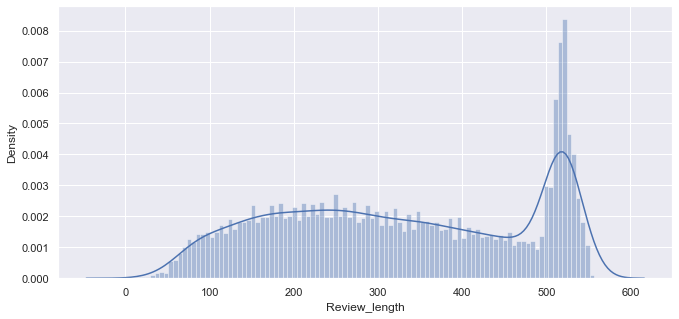

In [14]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(text_df['Review_length'] ,hist=True, bins=100)

## Verificando o Tamanho do Texto da Avalia√ß√£o com a Recomenda√ß√£o (Positiva/Negativa) <a class="anchor" id="eleventh-bullet"></a>

In [15]:
df_zero = text_df[text_df['Recommended']==0]
df_one = text_df[text_df['Recommended']==1]

<AxesSubplot:ylabel='Density'>

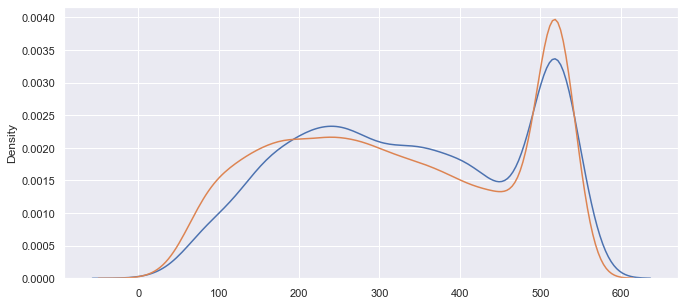

In [16]:
sns.distplot(df_zero[['Review_length']] ,hist=False)
sns.distplot(df_one[['Review_length']], hist=False)

<b>Contando o Pontos de Exclama√ß√£o das Avalia√ß√µes</b>

In [17]:
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count

In [18]:
text_df['count_exc'] = text_df['Review'].apply(count_exclamation_mark)
text_df.head(5)

Recommended                                             Review  \
0            1    Absolutely wonderful - silky and sexy and co...   
1            1    Love this dress!  it's sooo pretty.  i happe...   
2            0  Some major design flaws I had such high hopes ...   
3            1  My favorite buy! I love, love, love this jumps...   
4            1  Flattering shirt This shirt is very flattering...   

   Review_length  count_exc  
0             55          0  
1            305          1  
2            524          1  
3            141          3  
4            209          3

<b>Montando as Estat√≠sticas das Exclama√ß√µes Encontradas</b>

In [19]:
text_df['count_exc'].describe(np.arange(0.2, 1.0, 0.2))

count    22641.000000
mean         0.860651
std          1.386701
min          0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
80%          2.000000
max         41.000000
Name: count_exc, dtype: float64

<AxesSubplot:>

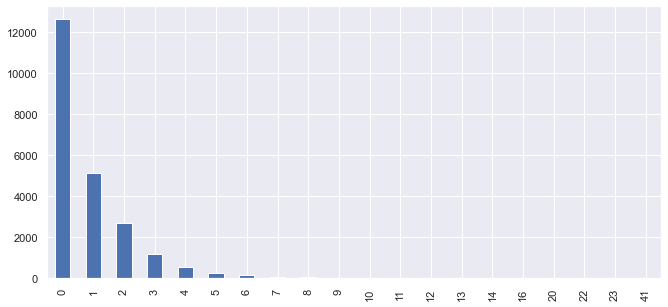

In [20]:
text_df['count_exc'].value_counts().sort_index().plot(kind='bar')

In [21]:
text_df[text_df['count_exc']== 41].index

Int64Index([3301], dtype='int64')

<b>Verificando a Avalia√ß√£o com o Maior N√∫mero de Exclama√ß√µes no Texto</b>

In [22]:
text_df['Review'][3301]

'Beautiful and unique. Love this top, just received it today.\r\nit is a very artistic interpretation for a casual top.\r\nthe blue is gorgeous!\r\nthe unique style of the peplm and the details on the front set this apart!\r\nruns a little shorter, but i feel the length enhances it;s beauty, and is appropriate for the overall design.\r\nlove !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\r\nordered my usual size and it fits perfectly.'

## Verificando Polaridade da Avalia√ß√£o <a class="anchor" id="Twelfth-bullet"></a>

<b>A Polaridade √© a emo√ß√£o expessada em uma senten√ßa. A Plaridade pode ser Positiva, Negativa ou Neutra. </b>
<br><b>A Polaridade possui uma pontua√ß√£o que vai de -1.0 a 1.0 do tipo float. </b></br>

In [23]:
text_df['Polarity'] = text_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_df.head(5)

Recommended                                             Review  \
0            1    Absolutely wonderful - silky and sexy and co...   
1            1    Love this dress!  it's sooo pretty.  i happe...   
2            0  Some major design flaws I had such high hopes ...   
3            1  My favorite buy! I love, love, love this jumps...   
4            1  Flattering shirt This shirt is very flattering...   

   Review_length  count_exc  Polarity  
0             55          0  0.633333  
1            305          1  0.339583  
2            524          1  0.073209  
3            141          3  0.560714  
4            209          3  0.512891

<AxesSubplot:ylabel='Frequency'>

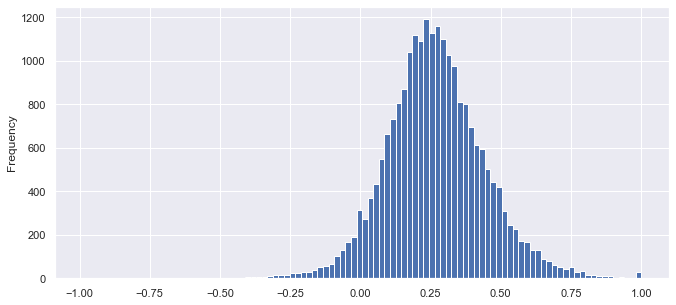

In [24]:
text_df['Polarity'].plot(kind='hist', bins=100)

In [25]:
text_prep = text_df.copy()

## Processando o Texto da Avalia√ß√£o <a class="anchor" id="Thirteenth-bullet"></a>

<b>Eliminando a pontua√ß√£o do texto. </b>

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [28]:
text_prep['Review'] = text_prep['Review'].apply(punctuation_removal)
text_prep['Review'].head()

0      Absolutely wonderful  silky and sexy and com...
1      Love this dress  its sooo pretty  i happened...
2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
Name: Review, dtype: object

## Verificando as Senten√ßas do Texto da Avalia√ß√£o <a class="anchor" id="fourteenth-bullet"></a>

<b>Muitos Adjetivos e Verbos refletem uma avalia√ß√£o positiva ou negativa.</b>


In [29]:
Image(url= "http://josecarilloforum.com/imgs/longnounphrase_schematic-1B.png", width=600, height=150)

In [30]:
def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [31]:
text_prep['Review'] = text_prep['Review'].apply(adj_collector)
text_prep['Review'].head(7)

0                                wonderful comfortable
1    Love happened find im did have ordered online ...
2    major had such high wanted work i ordered smal...
3         favorite love love fabulous wear i get great
4    Flattering is flattering due adjustable is per...
5    petite love reese is petite am tall wear was i...
6    aded last see look i went am pale is gorgeous ...
Name: Review, dtype: object

## Fazendo o Tratamento do Texto de Avalia√ß√£o <a class="anchor" id="fifteenth-bullet"></a>

<b>Verificando todas as Stopwords, ou seja, palavras para serem ignoradas</b>

In [32]:
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [33]:
stop = stopwords.words('english')
stop.append("i'm")

<b>Removendo a Pontua√ß√£o relacionada as Stopwords</b>

In [34]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


<b>Adicionado Stopwords relacionadas a roupas</b>

In [35]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [36]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [37]:
text_prep['Review'] = text_prep['Review'].apply(stopwords_removal)


<b>Verificando as avalia√ß√µes ap√≥s o Tratamento</b>

In [38]:
print(text_prep['Review'][3301])

['unique', 'received', 'artistic', 'casual', 'gorgeous', 'unique', 'runs', 'little', 'feel', 'enhances', 'appropriate', 'overall', 'ordered', 'usual', 'fits']


In [39]:
print(text_prep['Review'][267]) 

['nice', 'short', 'tall', 'iamp39d', 'say', 'fits', 'true', 'short', 'iamp39m', 'tall', 'wish', 'came']


<b>Removendo todo o texto relacionado √† tamanho e n√∫meros</b>

In [40]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [41]:
text_prep['Review'] = text_prep['Review'].apply(drop_numbers)
text_prep['Review'].head()

0                                wonderful comfortable
1    love happened find ordered online bc bought lo...
2    major high wanted work ordered small usual fou...
3                favorite love love fabulous get great
4    flattering flattering due adjustable perfect p...
Name: Review, dtype: object

In [42]:
print(text_prep['Review'][267]) 

nice short tall say fits true short tall wish came


In [43]:
print(text_prep['Review'][2293])

flattering purchased return expected fit said lbs got get disappointed soft purchase regular fit looked terrible say tall thin yes short petite


<b>Derivando as Palavras</b>

In [44]:
porter = PorterStemmer()

In [45]:
text_prep['Review'] = text_prep['Review'].apply(lambda x: x.split())
text_prep['Review'].head()

0                             [wonderful, comfortable]
1    [love, happened, find, ordered, online, bc, bo...
2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
Name: Review, dtype: object

In [46]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [47]:
text_prep['Review'] = text_prep['Review'].apply(stem_update)
text_prep['Review'].head()

0                                    [wonder, comfort]
1    [love, happen, find, order, onlin, bc, bought,...
2    [major, high, want, work, order, small, usual,...
3             [favorit, love, love, fabul, get, great]
4    [flatter, flatter, due, adjust, perfect, pair,...
Name: Review, dtype: object

In [48]:
text_prep['Review'] = text_prep['Review'].apply(lambda x: ' '.join(x))
text_prep['Review'].head()

0                                       wonder comfort
1    love happen find order onlin bc bought love hi...
2    major high want work order small usual found s...
3                    favorit love love fabul get great
4     flatter flatter due adjust perfect pair cardigan
Name: Review, dtype: object

In [49]:
print(text_prep['Review'][2293])

flatter purchas return expect fit said lb got get disappoint soft purchas regular fit look terribl say tall thin ye short petit


## Nuvem de Palavras das Avalia√ß√µes Positivas e Negativas <a class="anchor" id="sixteenth-bullet"></a>

In [50]:
pos_df = text_prep[text_prep.Recommended== 1]
neg_df = text_prep[text_prep.Recommended== 0]
pos_df.head(3)

Recommended                                             Review  \
0            1                                     wonder comfort   
1            1  love happen find order onlin bc bought love hi...   
3            1                  favorit love love fabul get great   

   Review_length  count_exc  Polarity  
0             55          0  0.633333  
1            305          1  0.339583  
3            141          3  0.560714

In [51]:
pos_words =[]
neg_words = []

for review in pos_df.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'major high want work order small usual found small small zip reorder petit ok overal comfort fit bottom tight sever cheap imo major net c petit love rees petit tall long full overwhelm small shorten narrow take love work return look cheap run small run order fit tight cheap pull caus rip disappoint go say go look style side purchas knew larg next imposs second look cheap awkward tight look describ'

<b>Nuvem de Palavras das Avalia√ß√µes Positivas</b>

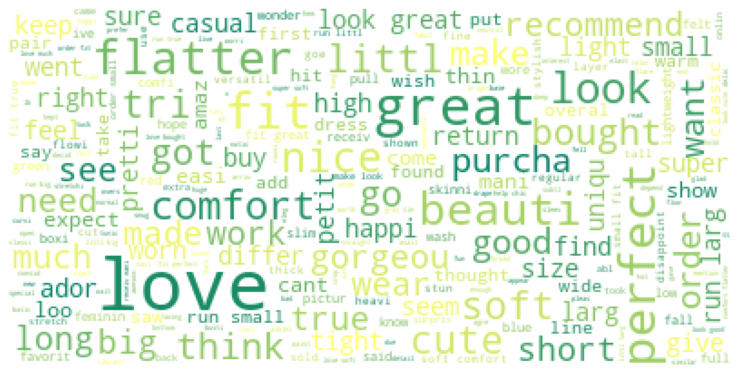

In [52]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>Nuvem de Palavras das Avalia√ß√µes Negativas</b>

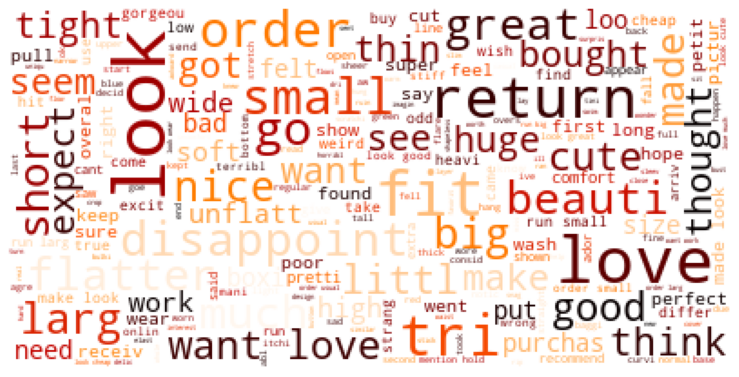

In [53]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Utilizando o Saco de Palavras <a class="anchor" id="seventeenth-bullet"></a>

<b> O modelo bag-of-words √© uma representa√ß√£o simplificadora usada no processamento de linguagem natural. Nesse modelo, um texto (como uma frase ou um documento) √© representado como a bolsa de suas palavras, desconsiderando a gram√°tica e at√© mesmo a ordem das palavras, mas mantendo a multiplicidade.</b>

In [54]:
text_prep['Review'].head()

0                                       wonder comfort
1    love happen find order onlin bc bought love hi...
2    major high want work order small usual found s...
3                    favorit love love fabul get great
4     flatter flatter due adjust perfect pair cardigan
Name: Review, dtype: object

In [55]:
def text_vectorizing_process(sentence_string):
    return [word for word in sentence_string.split()]

In [56]:
bow_transformer = CountVectorizer()
bow_transformer.fit(text_prep['Review'])

CountVectorizer()

In [57]:
print(text_prep['Review'].iloc[3])

favorit love love fabul get great


In [58]:
example = bow_transformer.transform([text_prep['Review'].iloc[3]])
print(example)
#3507=Love
#4438=petit

  (0, 2169)	1
  (0, 2231)	1
  (0, 2630)	1
  (0, 2750)	1
  (0, 3699)	2


In [59]:
Reviews = bow_transformer.transform(text_prep['Review'])
Reviews

<22641x7669 sparse matrix of type '<class 'numpy.int64'>'
	with 265056 stored elements in Compressed Sparse Row format>

In [60]:
print('Shape of Sparse Matrix', Reviews.shape)
print('Amount of Non-Zero occurences:', Reviews.nnz)

Shape of Sparse Matrix (22641, 7669)
Amount of Non-Zero occurences: 265056


## TF-IDF <a class="anchor" id="eighteenth-bullet"></a>

<b>Term Frequency‚ÄìInverse Document Frequency</b>

In [61]:
Image(url= "https://miro.medium.com/max/1400/1*qQgnyPLDIkUmeZKN2_ZWbQ.png", width=600, height=200)

In [62]:
tfidf_transformer = TfidfTransformer().fit(Reviews)

tfidf_example = tfidf_transformer.transform(example)
print (tfidf_example)
#3507=Love
#4438=petit

  (0, 3699)	0.43616489465843045
  (0, 2750)	0.26326798744495516
  (0, 2630)	0.3601343007117292
  (0, 2231)	0.4957223310180473
  (0, 2169)	0.6041628980955307


In [63]:
[i for i in bow_transformer.vocabulary_.items() if i[1]==3507]

[('legit', 3507)]

In [64]:
[i for i in bow_transformer.vocabulary_.items()][6:60:10]

[('onlin', 4396),
 ('work', 7547),
 ('tight', 6711),
 ('due', 1881),
 ('shorten', 5672),
 ('gorgeou', 2700)]

In [65]:
messages_tfidf = tfidf_transformer.transform(Reviews)
messages_tfidf.shape

(22641, 7669)

In [66]:
print(messages_tfidf[:1]) 
#tuple(index_num, word_num), tfidf_proba

  (0, 7530)	0.860915186093191
  (0, 1207)	0.5087485059969477


## Mesclando a matriz esparsa com outros recursos <a class="anchor" id="nineteenth-bullet"></a>

In [67]:
messages_tfidf = messages_tfidf.toarray()
messages_tfidf = pd.DataFrame(messages_tfidf)
print(messages_tfidf.shape)
messages_tfidf.head()

(22641, 7669)


0     1     2     3     4     5     6     7     8     9     ...  7659  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   7660  7661  7662  7663  7664      7665  7666  7667  7668  
0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0  0.214652   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  

[5 rows x 7669 columns]

In [68]:
df_all = pd.merge(text_prep.drop(columns='Review'),messages_tfidf, 
                  left_index=True, right_index=True )
df_all.head()

Recommended  Review_length  count_exc  Polarity    0    1    2    3    4  \
0            1             55          0  0.633333  0.0  0.0  0.0  0.0  0.0   
1            1            305          1  0.339583  0.0  0.0  0.0  0.0  0.0   
2            0            524          1  0.073209  0.0  0.0  0.0  0.0  0.0   
3            1            141          3  0.560714  0.0  0.0  0.0  0.0  0.0   
4            1            209          3  0.512891  0.0  0.0  0.0  0.0  0.0   

     5  ...  7659  7660  7661  7662  7663  7664      7665  7666  7667  7668  
0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
1  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
2  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.214652   0.0   0.0   0.0  
3  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
4  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  

[5 rows x 7673 columns]

## Dividindo os Dados <a class="anchor" id="twentieth-bullet"></a>

In [69]:
X = df_all.drop('Recommended', axis=1)
y = df_all.Recommended

X.head()

Review_length  count_exc  Polarity    0    1    2    3    4    5    6  ...  \
0             55          0  0.633333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1            305          1  0.339583  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2            524          1  0.073209  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3            141          3  0.560714  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4            209          3  0.512891  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   7659  7660  7661  7662  7663  7664      7665  7666  7667  7668  
0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0  0.214652   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  

[5 rows x 7672 columns]

In [70]:
X.shape

(21819, 7672)

In [71]:
X.describe()

Review_length     count_exc      Polarity             0             1  \
count   21819.000000  21819.000000  21819.000000  21819.000000  21819.000000   
mean      326.041386      0.860580      0.267154      0.000035      0.000022   
std       147.276319      1.388438      0.176592      0.003692      0.003312   
min        13.000000      0.000000     -0.987500      0.000000      0.000000   
25%       201.000000      0.000000      0.157382      0.000000      0.000000   
50%       319.000000      0.000000      0.260317      0.000000      0.000000   
75%       478.000000      1.000000      0.373017      0.000000      0.000000   
max       557.000000     41.000000      1.000000      0.405561      0.489153   

                  2             3             4             5             6  \
count  21819.000000  21819.000000  21819.000000  21819.000000  21819.000000   
mean       0.000018      0.000016      0.000065      0.000016      0.000015   
std        0.002697      0.002398      0.005649      0.002348      0.002226   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.398373      0.354255      0.600608      0.346865      0.328795   

       ...          7659          7660          7661          7662  \
count  ...  21819.000000  21819.000000  21819.000000  21819.000000   
mean   ...      0.000019      0.000058      0.000063      0.000031   
std    ...      0.002798      0.004330      0.005497      0.004603   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      0.413308      0.385078      0.590839      0.679991   

               7663          7664          7665          7666          7667  \
count  21819.000000  21819.000000  21819.000000  21819.000000  21819.000000   
mean       0.000062      0.000016      0.002114      0.000266      0.000022   
std        0.005341      0.002376      0.027143      0.010305      0.003310   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.499605      0.351029      0.626986      0.585885      0.488954   

               7668  
count  21819.000000  
mean       0.000113  
std        0.006880  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        0.530436  

[8 rows x 7672 columns]

In [72]:
X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, stratify=y, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15273, 7672), (6546, 7672), (15273,), (6546,))

In [73]:
y_train.value_counts(normalize=True)

1    0.819027
0    0.180973
Name: Recommended, dtype: float64

In [74]:
y_test.value_counts(normalize=True)

1    0.818973
0    0.181027
Name: Recommended, dtype: float64

## Utilizando o MinMax Scaler <a class="anchor" id="twenty-first-bullet"></a>

<b>Utilizando o scaler nos dados de treinamento. Significa que os dados de treinamento ser√£o usados para estimar os valores m√≠nimos e m√°ximos observ√°veis.</b>

In [75]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
pd.DataFrame(X_train_scaled,columns= X_train.columns).describe()

Review_length     count_exc      Polarity             0        1  \
count   15273.000000  15273.000000  15273.000000  15273.000000  15273.0   
mean        0.572427      0.020978      0.617947      0.000124      0.0   
std         0.271674      0.034138      0.092612      0.010881      0.0   
min         0.000000      0.000000      0.000000      0.000000      0.0   
25%         0.343808      0.000000      0.560503      0.000000      0.0   
50%         0.558226      0.000000      0.614197      0.000000      0.0   
75%         0.852126      0.024390      0.673239      0.000000      0.0   
max         1.000000      1.000000      1.000000      1.000000      0.0   

                  2        3             4             5             6  ...  \
count  15273.000000  15273.0  15273.000000  15273.000000  15273.000000  ...   
mean       0.000065      0.0      0.000065      0.000065      0.000065  ...   
std        0.008092      0.0      0.008092      0.008092      0.008092  ...   
min        0.000000      0.0      0.000000      0.000000      0.000000  ...   
25%        0.000000      0.0      0.000000      0.000000      0.000000  ...   
50%        0.000000      0.0      0.000000      0.000000      0.000000  ...   
75%        0.000000      0.0      0.000000      0.000000      0.000000  ...   
max        1.000000      0.0      1.000000      1.000000      1.000000  ...   

          7659     7660          7661     7662          7663          7664  \
count  15273.0  15273.0  15273.000000  15273.0  15273.000000  15273.000000   
mean       0.0      0.0      0.000109      0.0      0.000065      0.000065   
std        0.0      0.0      0.009735      0.0      0.008092      0.008092   
min        0.0      0.0      0.000000      0.0      0.000000      0.000000   
25%        0.0      0.0      0.000000      0.0      0.000000      0.000000   
50%        0.0      0.0      0.000000      0.0      0.000000      0.000000   
75%        0.0      0.0      0.000000      0.0      0.000000      0.000000   
max        0.0      0.0      1.000000      0.0      1.000000      1.000000   

               7665          7666          7667          7668  
count  15273.000000  15273.000000  15273.000000  15273.000000  
mean       0.003144      0.000446      0.000065      0.000185  
std        0.042774      0.017781      0.008092      0.013186  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 7672 columns]

## Visualiza√ß√£o PCA <a class="anchor" id="twenty-second-bullet"></a>

<b>A An√°lise de Componentes Principais ou PCA (Principal Component Analysis) √© uma t√©cnica de an√°lise multivariada que pode ser usada para analisar inter-rela√ß√µes entre um grande n√∫mero de vari√°veis e explicar essas vari√°veis em termos de suas dimens√µes inerentes (Componentes)</b>

In [77]:
pca_transformer = PCA(n_components=2).fit(X_train_scaled)
X_train_scaled_pca = pca_transformer.transform(X_train_scaled)
X_test_scaled_pca = pca_transformer.transform(X_test_scaled)
X_train_scaled_pca[:1]

array([[-0.30403434, -0.07548663]])

<AxesSubplot:>

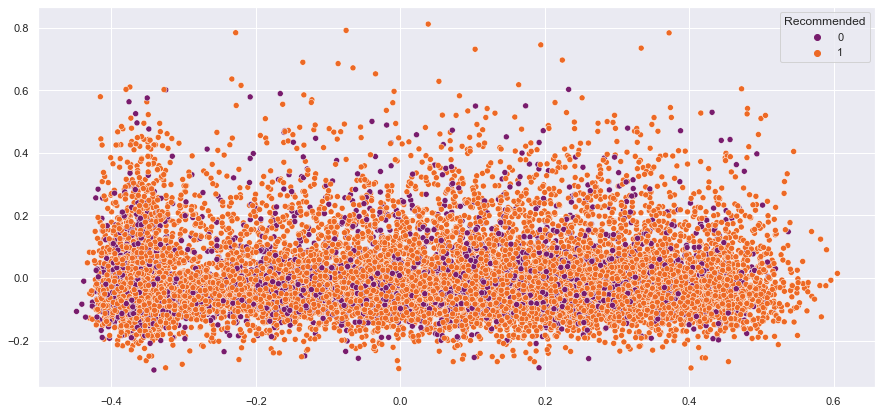

In [78]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X_train_scaled_pca[:, 0], 
                y=X_train_scaled_pca[:, 1], 
                hue=y_train, 
                sizes=100,
                palette="inferno") 

In [79]:
X_train_scaled = scipy.sparse.csr_matrix(X_train_scaled)
X_test_scaled = scipy.sparse.csr_matrix(X_test_scaled)

X_train = scipy.sparse.csr_matrix(X_train.values)
X_test = scipy.sparse.csr_matrix(X_test.values)
X_test

<6546x7672 sparse matrix of type '<class 'numpy.float64'>'
	with 92230 stored elements in Compressed Sparse Row format>

## Modelos <a class="anchor" id="twenty-third-bullet"></a>

In [80]:
def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred), 
                                        index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    return (f'Confusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

<b>A Avalia√ß√£o do Modelo ser√° feita por duas m√©tricas:</b>

<br>F1 micro score - que √© a m√©dia harm√¥nica de precis√£o e recall, e leva em considera√ß√£o os desequil√≠brios de r√≥tulo.</br>

<br>AUC - ROC √© uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Ele informa o quanto o modelo √© capaz de distinguir entre as classes.</br>

<b>1. Logistic Regression</b>

In [81]:
lr_model = LogisticRegression(class_weight='balanced', 
                              random_state=111, 
                              solver='lbfgs',
                              C=1.0)

gs_lr_model = GridSearchCV(lr_model, 
                           param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]}, 
                           cv=5, 
                           scoring='roc_auc')

gs_lr_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=111),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]}, scoring='roc_auc')

In [82]:
gs_lr_model.best_params_

{'C': 0.1}

In [83]:
test_predictions = gs_lr_model.predict(X_test_scaled)
print(report(y_test, test_predictions, gs_lr_model.classes_ ))

Confusion Matrix:
      0     1
0   803   382
1  1469  3892

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.68      0.46      1185
           1       0.91      0.73      0.81      5361

    accuracy                           0.72      6546
   macro avg       0.63      0.70      0.64      6546
weighted avg       0.81      0.72      0.75      6546



<AxesSubplot:title={'center':'ROC Curves - Logistic Regression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

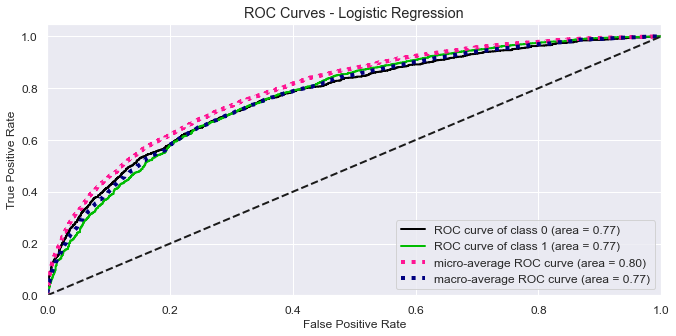

In [84]:
skplt.metrics.plot_roc(y_test, gs_lr_model.predict_proba(X_test_scaled),
                      title='ROC Curves - Logistic Regression') 

<b>2. SVM</b>

In [85]:
svc_model = SVC(C=1.0, 
             kernel='linear',
             class_weight='balanced', 
             probability=True,
             random_state=111)
svc_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)

In [86]:
test_predictions = svc_model.predict(X_test_scaled)
print(report(y_test, test_predictions, svc_model.classes_ ))

Confusion Matrix:
      0     1
0   685   500
1  1374  3987

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.58      0.42      1185
           1       0.89      0.74      0.81      5361

    accuracy                           0.71      6546
   macro avg       0.61      0.66      0.62      6546
weighted avg       0.79      0.71      0.74      6546



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

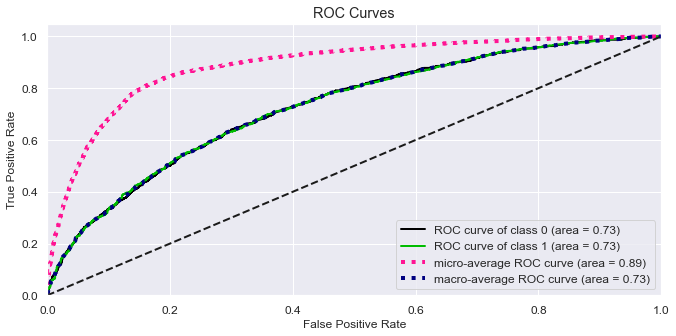

In [87]:
skplt.metrics.plot_roc(y_test, svc_model.predict_proba(X_test_scaled)) 

<b>3. Random Forest</b>

In [88]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=5, 
                                  class_weight='balanced', random_state=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       random_state=3)

In [89]:
test_predictions = rf_model.predict(X_test)
print(report(y_test, test_predictions, rf_model.classes_ ))

Confusion Matrix:
      0     1
0   743   442
1  1243  4118

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.63      0.47      1185
           1       0.90      0.77      0.83      5361

    accuracy                           0.74      6546
   macro avg       0.64      0.70      0.65      6546
weighted avg       0.81      0.74      0.76      6546



<AxesSubplot:title={'center':'ROC Curves - Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

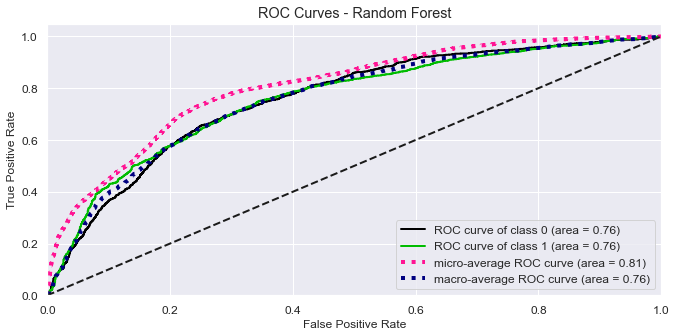

In [90]:
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test), 
                       title='ROC Curves - Random Forest') 

In [91]:
my_list = list(zip(rf_model.feature_importances_ ,X.columns))
my_list.sort(key=lambda tup: tup[0],reverse=True)
my_list[:7]

[(0.0719743075690777, 'Polarity'),
 (0.04108884824763568, 'count_exc'),
 (0.024867569383226092, 'Review_length'),
 (0.011255329815408487, 79),
 (0.009796167479568215, 2630),
 (0.008017978812729322, 2713),
 (0.0075692285111771, 2297)]

In [92]:
bow_list = [i for i in bow_transformer.vocabulary_.items()]

for i in my_list:
    for j in bow_list:
        if i[1] == j[1] and i[0]> 0.005:
            print(f'Importance: {i[0]:.4f}   Word num: {i[1]}   Word:  { j[0]}')

Importance: 0.0113   Word num: 79   Word:  ador
Importance: 0.0098   Word num: 2630   Word:  get
Importance: 0.0080   Word num: 2713   Word:  got
Importance: 0.0076   Word num: 2297   Word:  fine
Importance: 0.0074   Word num: 5897   Word:  small
Importance: 0.0074   Word num: 124   Word:  airi
Importance: 0.0073   Word num: 3466   Word:  layer
Importance: 0.0068   Word num: 5159   Word:  regular
Importance: 0.0068   Word num: 2231   Word:  favorit
Importance: 0.0067   Word num: 4044   Word:  move
Importance: 0.0063   Word num: 6291   Word:  stripe
Importance: 0.0061   Word num: 591   Word:  big
Importance: 0.0060   Word num: 3699   Word:  love
Importance: 0.0058   Word num: 6360   Word:  suggest
Importance: 0.0057   Word num: 3472   Word:  lb
Importance: 0.0056   Word num: 2363   Word:  flatter
Importance: 0.0055   Word num: 2246   Word:  feel
Importance: 0.0051   Word num: 5276   Word:  return


<b>Random Forest - Threshold:</b>

In [93]:
probs = rf_model.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs[:,1])

Text(0, 0.5, 'TPR')

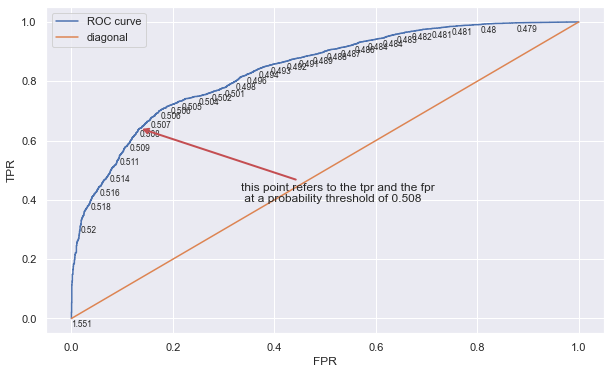

In [94]:
#Train
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, '-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::100], tpr[::100], thresholds[::100]):
    plt.annotate(np.round(txt,3), (x, y-0.03), fontsize='x-small')
rnd_idx = 700
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'\
             .format(np.round(thresholds[rnd_idx], 4)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->',color='r'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [95]:
probs = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:,1])

Text(0, 0.5, 'TPR')

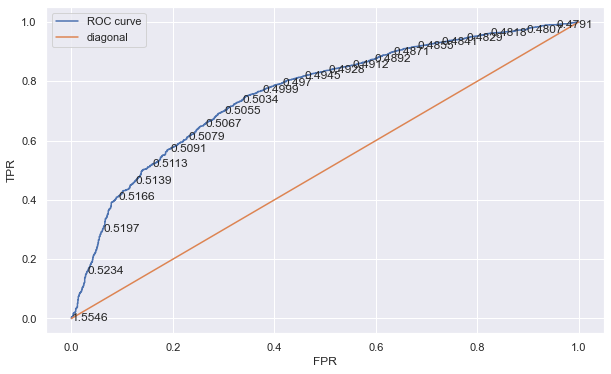

In [96]:
#Test
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, '-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::70], tpr[::70], thresholds[::70]):
    plt.annotate(np.round(txt,4), (x, y-0.01))

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

<b>4. AdaBoost</b>

In [97]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=555)

ada_model = AdaBoostClassifier(base_estimator=dt, learning_rate=0.001, n_estimators=1000, random_state=222)
ada_model.fit(X_train ,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=5,
                                                         random_state=555),
                   learning_rate=0.001, n_estimators=1000, random_state=222)

In [98]:
test_predictions = ada_model.predict(X_test)
print(report(y_test, test_predictions, ada_model.classes_ ))

Confusion Matrix:
      0     1
0   718   467
1  1179  4182

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.61      0.47      1185
           1       0.90      0.78      0.84      5361

    accuracy                           0.75      6546
   macro avg       0.64      0.69      0.65      6546
weighted avg       0.81      0.75      0.77      6546



<AxesSubplot:title={'center':'ROC Curves - AdaBoost'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

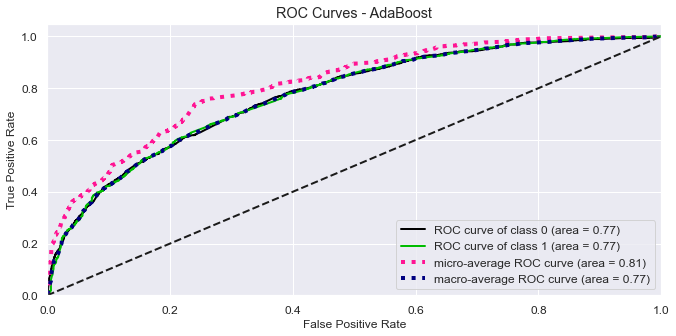

In [99]:
skplt.metrics.plot_roc(y_test, ada_model.predict_proba(X_test), 
                       title='ROC Curves - AdaBoost') 

## Resultados <a class="anchor" id="twenty-fourth-bullet"></a>

<b>
* Logistic Regression - 0.72
<br>* SVM - 0.72</br>
<br>* Random Forest - 0.76</br>
<br>* AdaBoost - 0.74 </br>   
</b>

In [100]:
labels = text_prep['Recommended']
train_set=text_prep['Review']
tf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), lowercase=True, use_idf=True)
features = tf_vectorizer.fit_transform(text_prep['Review'])
svc_model.fit(features,labels)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)

In [101]:

recommendation_text = widgets.Text(
  description='Recommendation:',
  placeholder='Write a recommendation'
)
btn_predict = widgets.Button(
  description='Verificar',
  disabled=False,
  tooltip='Verifique aqui...',
  button_style='success', # pode ser 'success', 'info', 'warning', 'danger' ou ''
  icon='check'
)
box_result = widgets.Box(
  [
    widgets.HTML(
        value= f"<span style='font-size:2.3em; color:blue'>Resultado: </span>"
                 ),
    widgets.HTML(
        value=f"<span style='font-size:2.3em'>\U00002796</span>"
        )
  ]
)
teste = widgets.Label(
  value='---'
)
display(recommendation_text,btn_predict,box_result,teste)

def prediction_query(s):
    word_find = False
    box_result.children[1].value =f"<span style='font-size:2.3em'>\U00002796</span>"
    text_pred= recommendation_text.value
    #Eliminar pontua√ß√µes
    punct = string.punctuation
    for c in punct:
        text_pred = text_pred.replace(c, "")
    text_pred = text_pred.split()
    #Eliminar stopwords 
    text_pred = [word for word in text_pred if word not in stopwords.words('english')]
    #Eliminar n√∫meros
    text_pred = [i for i in text_pred if not i.isdigit()]
    text_neg = neg_words.split()
    text_pos = pos_words.split()
    for a in text_pred:
        for b in text_neg:
            if a==b:
                word_find = True
    for x in text_pred:
        for y in text_pos:
            if x == y :
                word_find = True
    if word_find == True:
        vector_recommendation = tf_vectorizer.transform([recommendation_text.value])
        prediction = svc_model.predict(vector_recommendation)
        if prediction == 1:
            box_result.children[1].value = f"<span style='font-size:2.3em'>\U0001f600</span>"
        else:
            box_result.children[1].value = f"<span style='font-size:2.3em'>\U0001F61E</span>"
    teste.value = str(text_pred)
btn_predict.on_click(prediction_query)

Text(value='', description='Recommendation:', placeholder='Write a recommendation')

Button(button_style='success', description='Verificar', icon='check', style=ButtonStyle(), tooltip='Verifique ‚Ä¶

Box(children=(HTML(value="<span style='font-size:2.3em; color:blue'>Resultado: </span>"), HTML(value="<span st‚Ä¶

Label(value='---')